# Data Analysis Examples 

## Bitly Data from 1.USA.gov

In 2011, the URL shortening service *Bitly* partnered with the US government website USA.gov to provide a feed of anonymous data gathered from users who shorten links ending with .gov or .mil. In 2011, a live feed as well as hourly snapshots were available as downloadable text files. 

In the case of the hourly snapshots, each line in each file contains a common form of web data known as JSON

In [1]:
path = "pydata-book/datasets/bitly_usagov/example.txt"

In [2]:
import json
with open(path) as f:
    #print(f.readline()) - each line is in the form of JSON data
    records = [json.loads(line) for line in f] 

In [3]:
records[0] # list of python dictionary

{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 'c': 'US',
 'nk': 1,
 'tz': 'America/New_York',
 'gr': 'MA',
 'g': 'A6qOVH',
 'h': 'wfLQtf',
 'l': 'orofrog',
 'al': 'en-US,en;q=0.8',
 'hh': '1.usa.gov',
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991',
 't': 1331923247,
 'hc': 1331822918,
 'cy': 'Danvers',
 'll': [42.576698, -70.954903]}

## Counting Time Zones in Pure Python

Suppose we were interested in finding the time zones that occur most often in the dataset (the tz field). 

In [4]:
# time_zones = [rec["tz"] for rec in records]

Oops! Turns out that not all of the records have a time zone field. We can handle this by adding the check if "tz" in rec at the end of the list comprehension:

In [5]:
time_zones = [rec["tz"] for rec in records if "tz" in rec]

time_zones[:10]

['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York',
 'America/New_York',
 'Europe/Warsaw',
 '',
 '',
 '']

Next, to produce counts by time zone, I’ll show two approaches: a harder way (using just the Python standard library) and a simpler way (using pandas). One way to do the counting is to use a dictionary to store counts while we iterate through the time zones:

In [6]:
def get_counts(seq):
    counts = {}
    for x in seq:
        if x in counts:
            counts[x] += 1
        else:
            counts[x] = 1
    return counts

Using more advanced tools in the Python standard library, you can write the same thing more briefly:

In [7]:
from collections import defaultdict

def get_counts2(seq):
    counts = defaultdict(int) # values are initialized to 0
    for x in seq:
        counts[x] += 1
    return counts

In [8]:
# To use it on the time zones, just pass the time_zones list:

counts = get_counts(time_zones)
counts["America/New_York"]

1251

In [9]:
len(time_zones)

3440

If we wanted the top 10 time zones and their counts, we can make a list of tuples by (count, timezone) and sort it:

In [10]:
def top_counts(count_dict, n=10):
    value_key = [(count, tz) for tz, count in count_dict.items()]
    value_key.sort()
    return value_key[-n:]

In [11]:
top_counts(counts)

[(33, 'America/Sao_Paulo'),
 (35, 'Europe/Madrid'),
 (36, 'Pacific/Honolulu'),
 (37, 'Asia/Tokyo'),
 (74, 'Europe/London'),
 (191, 'America/Denver'),
 (382, 'America/Los_Angeles'),
 (400, 'America/Chicago'),
 (521, ''),
 (1251, 'America/New_York')]

In [12]:
from collections import Counter

counts = Counter(time_zones)
counts.most_common(10)

[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33)]

## Counting Time Zones with pandas

Create a DataFrame from the original set of records by passing the list of records to pandas.DataFrame:

In [13]:
import pandas as pd

frame = pd.DataFrame(records)

We can look at some basic information about this new DataFrame, such as column names, inferred column types, or number of missing values, using frame.info():

In [14]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   a            3440 non-null   object 
 1   c            2919 non-null   object 
 2   nk           3440 non-null   float64
 3   tz           3440 non-null   object 
 4   gr           2919 non-null   object 
 5   g            3440 non-null   object 
 6   h            3440 non-null   object 
 7   l            3440 non-null   object 
 8   al           3094 non-null   object 
 9   hh           3440 non-null   object 
 10  r            3440 non-null   object 
 11  u            3440 non-null   object 
 12  t            3440 non-null   float64
 13  hc           3440 non-null   float64
 14  cy           2919 non-null   object 
 15  ll           2919 non-null   object 
 16  _heartbeat_  120 non-null    float64
 17  kw           93 non-null     object 
dtypes: float64(4), object(14)
memory usage: 500.8+ K

In [15]:
frame["tz"].count

<bound method Series.count of 0          America/New_York
1            America/Denver
2          America/New_York
3         America/Sao_Paulo
4          America/New_York
               ...         
3555       America/New_York
3556        America/Chicago
3557         America/Denver
3558    America/Los_Angeles
3559       America/New_York
Name: tz, Length: 3560, dtype: object>

In [16]:
tz_counts = frame["tz"].value_counts()

tz_counts.head()

tz
America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Name: count, dtype: int64

We can visualize this data using matplotlib. We can make the plots a bit nicer by filling in a substitute value for unknown or missing time zone data in the records. We replace the missing values with the fillna method and use Boolean array indexing for the empty strings:

In [17]:
clean_tz = frame["tz"].fillna("Missing")

clean_tz[clean_tz == ""] = "Unknown"

tz_counts = clean_tz.value_counts()

tz_counts.head()

tz
America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Name: count, dtype: int64

At this point, we can use the seaborn package to make a horizontal bar plot (see Top time zones in the 1.usa.gov sample data for the resulting visualization):

<Axes: ylabel='tz'>

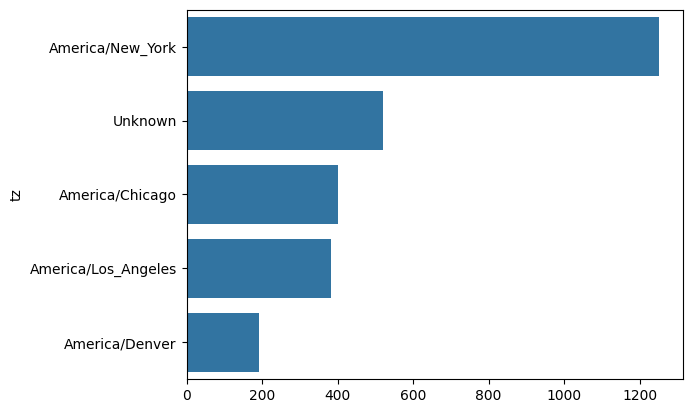

In [18]:
import seaborn as sns

subset = tz_counts.head()

sns.barplot(y=subset.index, x=subset.to_numpy())

The *a* field contains information about the browser, device, or application used to perform the URL shortening:

In [19]:
frame["a"][3]

'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8) AppleWebKit/534.52.7 (KHTML, like Gecko) Version/5.1.2 Safari/534.52.7'

In [20]:
frame["a"][46][:50] # size of line to be printed

'BlackBerry8520/5.0.0.592 Profile/MIDP-2.1 Configur'

One possible strategy is to split off the first token in the string (corresponding roughly to the browser capability) and make another summary of the user behavior:

In [21]:
results = pd.Series([x.split()[0] for x in frame["a"].dropna()])
results.head(5)

0               Mozilla/5.0
1    GoogleMaps/RochesterNY
2               Mozilla/4.0
3               Mozilla/5.0
4               Mozilla/5.0
dtype: object

In [22]:
results.value_counts().head(8)

Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
Name: count, dtype: int64

Now, suppose you wanted to decompose the top time zones into Windows and non-Windows users. As a simplification, let’s say that a user is on Windows if the string "Windows" is in the agent string. Since some of the agents are missing, we’ll exclude these from the data:

In [23]:
import numpy as np

In [24]:
cframe = frame[frame["a"].notna()].copy()

cframe["os"] = np.where(cframe["a"].str.contains("Windows"), "Windows",
"Not Windows")

In [25]:
cframe["os"].head(7)

0        Windows
1    Not Windows
2        Windows
3    Not Windows
4        Windows
5        Windows
6        Windows
Name: os, dtype: object

Then, you can group the data by its time zone column and this new list of operating systems:

In [26]:
by_tz_os = cframe.groupby(["tz", "os"])

The group counts, analogous to the value_counts function, can be computed with size. This result is then reshaped into a table with unstack:

In [27]:
agg_counts = by_tz_os.size().unstack().fillna(0)

agg_counts.head()

os,Not Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0


Finally, let’s select the top overall time zones. To do so, I construct an indirect index array from the column counts in **agg_counts**. After computing the column counts with agg_counts.sum("columns"), I can call **argsort()** to obtain an index array that can be used to sort in ascending order:

In [28]:
indexer = agg_counts.sum("columns").argsort()
indexer.values[:10]

array([24, 20, 21, 92, 87, 53, 54, 57, 26, 55])

I use **take** to select the rows in that order, then slice off the last 10 rows (largest values):

In [29]:
count_subset = agg_counts.take(indexer[-10:])
count_subset

os,Not Windows,Windows
tz,,
America/Sao_Paulo,13.0,20.0
Europe/Madrid,16.0,19.0
Pacific/Honolulu,0.0,36.0
Asia/Tokyo,2.0,35.0
Europe/London,43.0,31.0
America/Denver,132.0,59.0
America/Los_Angeles,130.0,252.0
America/Chicago,115.0,285.0
,245.0,276.0


pandas has a convenience method called nlargest that does the same thing:

In [30]:
agg_counts.sum(axis="columns").nlargest(10)

tz
America/New_York       1251.0
                        521.0
America/Chicago         400.0
America/Los_Angeles     382.0
America/Denver          191.0
Europe/London            74.0
Asia/Tokyo               37.0
Pacific/Honolulu         36.0
Europe/Madrid            35.0
America/Sao_Paulo        33.0
dtype: float64

Then, this can be plotted in a grouped bar plot comparing the number of Windows and non-Windows users, using seaborn's barplot function.
I first call `count_subset.stack()` and reset the index to rearrange the data for better compatibility with seaborn:

In [31]:
count_subset = count_subset.stack()

count_subset.name = "total"

count_subset = count_subset.reset_index()

count_subset.head(13)

,tz,os,total
0,America/Sao_Paulo,Not Windows,13.0
1,America/Sao_Paulo,Windows,20.0
2,Europe/Madrid,Not Windows,16.0
3,Europe/Madrid,Windows,19.0
4,Pacific/Honolulu,Not Windows,0.0
5,Pacific/Honolulu,Windows,36.0
6,Asia/Tokyo,Not Windows,2.0
7,Asia/Tokyo,Windows,35.0
8,Europe/London,Not Windows,43.0
9,Europe/London,Windows,31.0


<Axes: xlabel='total', ylabel='tz'>

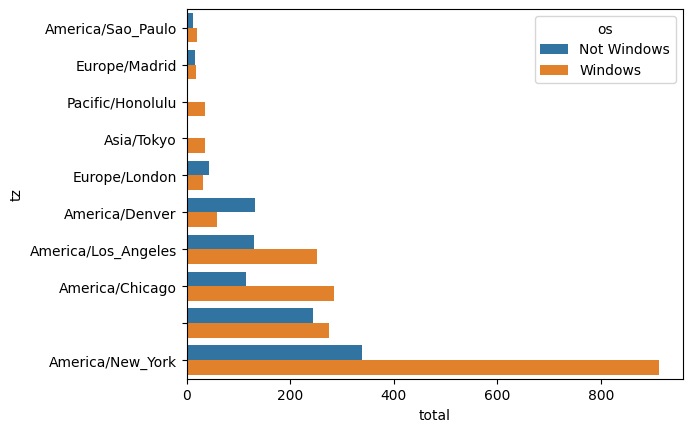

In [32]:
sns.barplot(x="total", y="tz", hue="os", data=count_subset)

It is a bit difficult to see the relative percentage of Windows users in the smaller groups, so let's normalize the group percentages to sum to 1:

In [36]:
def norm_total(group):
    group["normed_total"] = group["total"] / group["total"].sum()
    return group

results = count_subset.groupby("tz").apply(norm_total)

<Axes: xlabel='normed_total', ylabel='tz'>

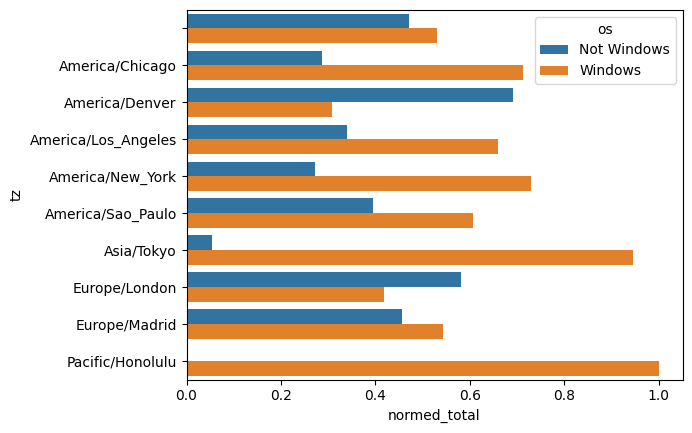

In [37]:
sns.barplot(x="normed_total", y="tz", hue="os", data=results)

We could have computed the normalized sum more efficiently by using the transform method with groupby:

In [38]:
g = count_subset.groupby("tz")

result2 = count_subset["total"] / g["total"].transform("sum")